In [1]:
import sys
import os
path_helper = ["c:\\","Users","vfriedrich","projects","gating","reproducibility_cleaned","helper"]
sys.path.append(os.path.join(*path_helper))
import helper_reproducibility as hr
import convexgating as cg
import scanpy as sc
import anndata as ann
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import os
import re
import json
from pywget import wget
import seaborn as sns
print(sys.executable)

C:\Users\vfriedrich\Anaconda3\envs\gating_env_local_parameter_option\python.exe


In [2]:
pre = 'summary_03'
start_time = hr.get_time()

In [3]:
path_output_data = hr.return_output_data_path()
path_output_script = os.path.join(path_output_data,pre)
hr.make_path(os.path.join(path_output_script))

path exists


In [4]:
path_main_COVID_figure = os.path.join('C:\\Users\\vfriedrich\\projects\\gating\\reproducibility_cleaned','main_Figure_COVID')
path_main_bridge_figure = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility_cleaned\\main_Figure_bridge_gap'

## CD4

In [5]:
columns = ['cluster', 'f1', 'recall', 'precision', 'hierarchy', 'modality','panel']
#CyTOF
df_CD4 = pd.DataFrame(columns = columns)
for cluster in ['C7','C8']:
    path = os.path.join(path_main_COVID_figure,'output_data','COV02_run_gating',cluster)
    df = pd.read_csv(os.path.join(path,'performance_summary.csv'))
    df['modality'] = 'CyTOF'
    df['panel'] = 'full'
    df_CD4 = df_CD4.append(df)
for cluster in ['C7','C8']:
    for panel in ['joint_panel','FACS_panel']:
        path = os.path.join(path_main_bridge_figure,'CyTOF','output_data','CyTOF_01_run_gating',cluster + '_' + panel)
        df = pd.read_csv(os.path.join(path,'performance_summary.csv'))
        df['modality'] = 'CyTOF'
        df['panel'] = panel
        df_CD4 = df_CD4.append(df)

#CITEseq
path = os.path.join(path_main_bridge_figure,'CITEseq','output_data','CITEseq_05_run_gating','HLA-DR+ CD16+ CD4+ T cell_' +panel)
df = pd.read_csv(os.path.join(path,'performance_summary.csv'))
df['modality'] = 'CITEseq'
df['panel'] = 'full'
df_CD4 = df_CD4.append(df)
for panel in ['joint_panel','FACS_panel']:
    path = os.path.join(path_main_bridge_figure,'CITEseq','output_data','CITEseq_05_run_gating','HLA-DR+ CD16+ CD4+ T cell_' +panel)
    df = pd.read_csv(os.path.join(path,'performance_summary.csv'))
    df['modality'] = 'CITEseq'
    df['panel'] = panel
    df_CD4 = df_CD4.append(df)

#FACS
for panel in ['full','reduced']:
    path = os.path.join(path_main_bridge_figure,'FACS','fig7_' + panel,panel,'cluster_CD16+ CD4+ T cell')
    f1,recall,precision,hierarchy = hr.get_f1_hierarch(os.path.join(path,'performance.csv'))
    df = pd.DataFrame([['CD16+ CD4+ T cell',f1,recall,precision,hierarchy,'FACS',panel]],columns = columns)
    df_CD4 = df_CD4.append(df)

### Visualize

In [6]:
df_CD4

,cluster,f1,recall,precision,hierarchy,modality,panel
0,C7,0.676877,0.579840,0.812921,4,CyTOF,full
0,C8,0.551310,0.441627,0.733479,2,CyTOF,full
0,C7,0.683465,0.624960,0.754054,3,CyTOF,joint_panel
0,C7,0.221336,0.585920,0.136438,4,CyTOF,FACS_panel
0,C8,0.677020,0.609969,0.760632,2,CyTOF,joint_panel
0,C8,0.600141,0.558811,0.648073,2,CyTOF,FACS_panel
0,HLA-DR+ CD16+ CD4+ T cell,0.944591,0.904040,0.988950,2,CITEseq,full
0,HLA-DR+ CD16+ CD4+ T cell,0.957179,0.959596,0.954774,3,CITEseq,joint_panel
0,HLA-DR+ CD16+ CD4+ T cell,0.944591,0.904040,0.988950,2,CITEseq,FACS_panel
0,CD16+ CD4+ T cell,0.746269,0.600000,0.986842,2,FACS,full


In [7]:
df_CD4['ID'] = df_CD4['cluster'] + '_' + df_CD4['modality'] + '_' + df_CD4['panel']
df_CD4_melted = pd.melt(df_CD4[['f1','recall','precision','ID']], id_vars="ID", var_name="metric", value_name="score")

palette={"recall": "#e2998a","f1": "#663171","precision":"#0c7156"}
order = ['C7_CyTOF_full','C7_CyTOF_joint_panel','C7_CyTOF_FACS_panel',
         'C8_CyTOF_full','C8_CyTOF_joint_panel','C8_CyTOF_FACS_panel',
         'HLA-DR+ CD16+ CD4+ T cell_CITEseq_full','HLA-DR+ CD16+ CD4+ T cell_CITEseq_joint_panel','HLA-DR+ CD16+ CD4+ T cell_CITEseq_FACS_panel',
         'CD16+ CD4+ T cell_FACS_full','CD16+ CD4+ T cell_FACS_reduced']

<Figure size 640x480 with 0 Axes>

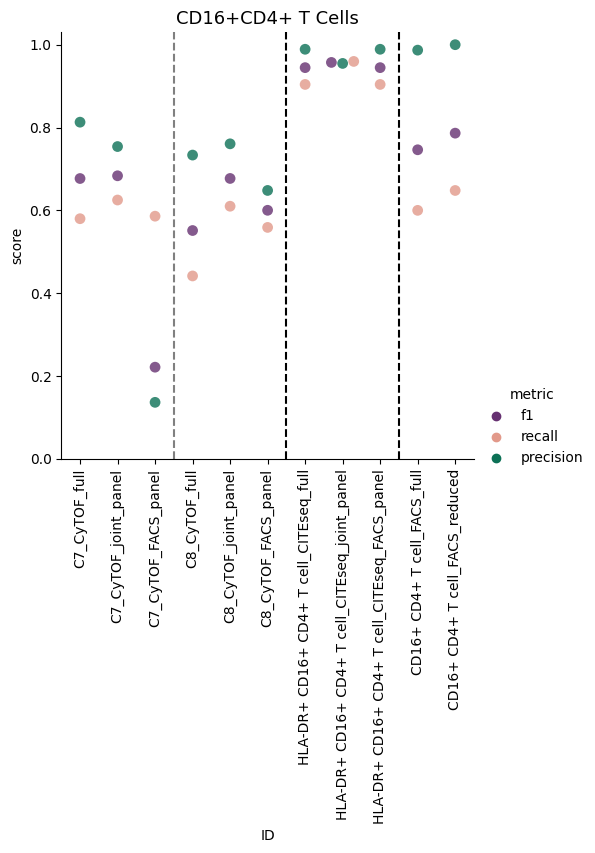

In [8]:
plt.figure()
sns.catplot(x='ID', y="score", hue="metric", data=df_CD4_melted,s=60, kind='swarm',palette=palette,order = order,height = 5,alpha = 0.8)
plt.ylim([0,1.03])
plt.axvline(x=2.5, color='grey', linestyle='--',linewidth=1.5)
plt.axvline(x=5.5, color='k', linestyle='--',linewidth=1.5)
plt.axvline(x=8.5, color='k', linestyle='--',linewidth=1.5)

plt.xticks(rotation=90)
plt.title('CD16+CD4+ T Cells',fontsize =13)
plt.savefig(os.path.join(path_output_script, pre + '_CD4_plot_score_summary.pdf'),dpi = 300,bbox_inches='tight')
plt.show()

## CD8

In [9]:
columns = ['cluster', 'f1', 'recall', 'precision', 'hierarchy', 'modality','panel']
#CyTOF
df_CD8 = pd.DataFrame(columns = columns)
for cluster in ['C25','C26']:
    path = os.path.join(path_main_COVID_figure,'output_data','COV02_run_gating',cluster)
    df = pd.read_csv(os.path.join(path,'performance_summary.csv'))
    df['modality'] = 'CyTOF'
    df['panel'] = 'full'
    df_CD8 = df_CD8.append(df)
for cluster in ['C25','C26']:
    for panel in ['joint_panel','FACS_panel']:
        path = os.path.join(path_main_bridge_figure,'CyTOF','output_data','CyTOF_01_run_gating',cluster + '_' + panel)
        df = pd.read_csv(os.path.join(path,'performance_summary.csv'))
        df['modality'] = 'CyTOF'
        df['panel'] = panel
        df_CD8 = df_CD8.append(df)

#CITEseq
path = os.path.join(path_main_bridge_figure,'CITEseq','output_data','CITEseq_05_run_gating','HLA-DR+ CD16+ CD8+ T cell_' +panel)
df = pd.read_csv(os.path.join(path,'performance_summary.csv'))
df['modality'] = 'CITEseq'
df['panel'] = 'full'
df_CD8 = df_CD8.append(df)
for panel in ['joint_panel','FACS_panel']:
    path = os.path.join(path_main_bridge_figure,'CITEseq','output_data','CITEseq_05_run_gating','HLA-DR+ CD16+ CD8+ T cell_' +panel)
    df = pd.read_csv(os.path.join(path,'performance_summary.csv'))
    df['modality'] = 'CITEseq'
    df['panel'] = panel
    df_CD8 = df_CD8.append(df)

#FACS
for panel in ['full','reduced']:
    path = os.path.join(path_main_bridge_figure,'FACS','fig7_' + panel,panel,'cluster_CD16+ CD8+ T cell')
    f1,recall,precision,hierarchy = hr.get_f1_hierarch(os.path.join(path,'performance.csv'))
    df = pd.DataFrame([['CD16+ CD8+ T cell',f1,recall,precision,hierarchy,'FACS',panel]],columns = columns)
    df_CD8 = df_CD8.append(df)

### Visualize

In [10]:
df_CD8['ID'] = df_CD8['cluster'] + '_' + df_CD8['modality'] + '_' + df_CD8['panel']
df_CD8_melted = pd.melt(df_CD8[['f1','recall','precision','ID']], id_vars="ID", var_name="metric", value_name="score")

palette={"recall": "#e2998a","f1": "#663171","precision":"#0c7156"}
order = ['C25_CyTOF_full','C25_CyTOF_joint_panel','C25_CyTOF_FACS_panel',
         'C26_CyTOF_full','C26_CyTOF_joint_panel','C26_CyTOF_FACS_panel',
         'HLA-DR+ CD16+ CD8+ T cell_CITEseq_full','HLA-DR+ CD16+ CD8+ T cell_CITEseq_joint_panel','HLA-DR+ CD16+ CD8+ T cell_CITEseq_FACS_panel',
         'CD16+ CD8+ T cell_FACS_full','CD16+ CD8+ T cell_FACS_reduced']

<Figure size 640x480 with 0 Axes>

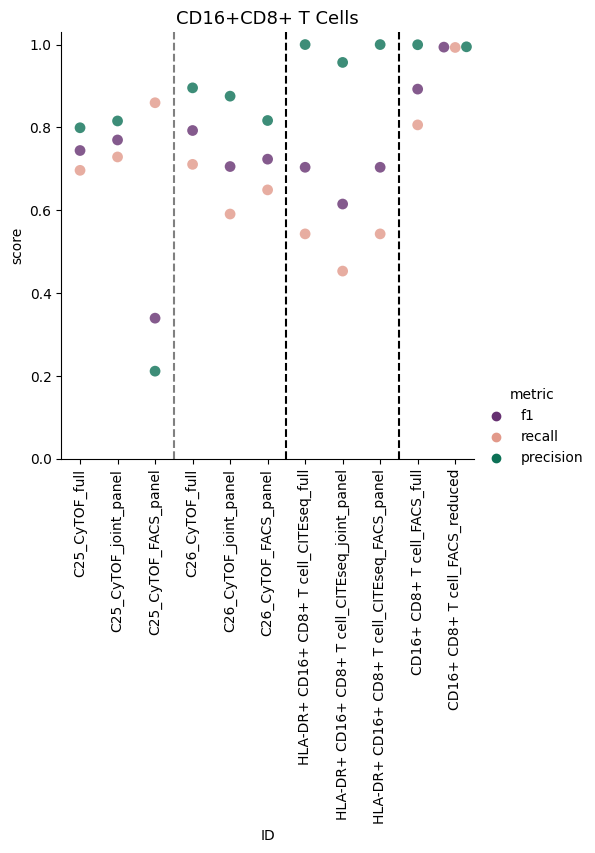

In [11]:
plt.figure()
sns.catplot(x='ID', y="score", hue="metric", data=df_CD8_melted,s=60, kind='swarm',palette=palette,order = order,height = 5,alpha = 0.8)
plt.ylim([0,1.03])
plt.axvline(x=2.5, color='grey', linestyle='--',linewidth=1.5)
plt.axvline(x=5.5, color='k', linestyle='--',linewidth=1.5)
plt.axvline(x=8.5, color='k', linestyle='--',linewidth=1.5)

plt.xticks(rotation=90)
plt.title('CD16+CD8+ T Cells',fontsize =13)
plt.savefig(os.path.join(path_output_script, pre + '_CD8_plot_score_summary.pdf'),dpi = 300,bbox_inches='tight')
plt.show()

In [12]:
hr.save_package_versions(hr.return_base_package_version_path(),pre = pre,do_print = True)
sc.logging.print_versions()
end_time = hr.get_time()
hr.get_time_delta(start_time,end_time,pre=pre,save=True)

babel==2.13.1
qtpy==2.4.1
sqlalchemy==2.0.23
send2trash==1.8.2
anyio==4.1.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.1.0
beautifulsoup4==4.12.2
bleach==6.1.0
certifi==2023.11.17
cffi==1.16.0
charset-normalizer==3.3.2
colorama==0.4.6
comm==0.2.0
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.0
fqdn==1.5.1
greenlet==3.0.1
idna==3.6
importlib-metadata==7.0.0
ipykernel==6.27.1
ipython==8.18.1
ipython-genutils==0.2.0
ipython-sql==0.5.0
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.1
json5==0.9.14
jsonpointer==2.4
jsonschema==4.20.0
jsonschema-specifications==2023.11.2
jupyter==1.0.0
jupyter-client==8.6.0
jupyter-console==6.6.3
jupyter-core==5.5.0
jupyter-events==0.9.0
jupyter-lsp==2.2.1
jupyter-server==2.11.2
jupyter-server-terminals==0.4.4
jupyterlab==4.0.9
jupyterlab-pygments==0.3.0
jupyterlab-server==2.25.2
jupyterlab-widgets==3.0.9
matplotlib-inline==0.1.6


datetime.timedelta(seconds=4, microseconds=847269)